In [1]:
# global definitions (Fig 9)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

# US
#followers_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/us/exp_results/source_ideological_dimensions.csv'
#parliamentarians_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/us/exp_results/target_ideological_dimensions.csv'
#parliamentarians_group_file = '/home/foula/linate/plos_asonam_exp_data/us/UnitedStates_reference_group.csv'
#group_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/us/UnitedStates_group_attitudes.csv'
#group_graph_color_and_location_file = '/home/foula/linate/plos_asonam_exp_data/us/party_graph_colors_and_location.csv'
#graph_xlim = (-1.5, 2)
#graph_ylim = (-1.5, 3)
#country = 'US'
#graph_text_x = 0.3
#graph_text_y = 2.7
#legend_loc = 'lower right'

# Chile
followers_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/exp_results/source_ideological_dimensions.csv'
parliamentarians_latent_dimensions_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/exp_results/target_ideological_dimensions.csv'
parliamentarians_group_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/ChileOwn_reference_group.csv'
group_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/ChileOwn_group_attitudes.csv'
group_graph_color_and_location_file = '/home/foula/linate/plos_asonam_exp_data/chile_own/party_graph_colors_and_location.csv'
graph_xlim = (-1.5, 3)
graph_ylim = (-2, 3)
country = 'Chile'
graph_text_x = 0.5
graph_text_y = 2.7
legend_loc = 'lower right'

In [2]:
# load latent dimensions : followers

followers_df = pd.read_csv(followers_latent_dimensions_file)
followers_df.head()

,source_id,latent_dimension_0,latent_dimension_1,latent_dimension_2,latent_dimension_3,latent_dimension_4,latent_dimension_5,latent_dimension_6,latent_dimension_7,latent_dimension_8,...,latent_dimension_177,latent_dimension_178,latent_dimension_179,latent_dimension_180,latent_dimension_181,latent_dimension_182,latent_dimension_183,latent_dimension_184,latent_dimension_185,latent_dimension_186
0,0,-0.793397,0.819128,0.265994,-0.050575,-0.272589,0.402408,0.004310,0.350036,-0.211278,...,-0.088982,0.048206,-0.088540,-0.271438,0.066656,-0.005892,0.010581,-0.005985,-0.006319,-2.331118e-14
1,1,-0.933115,0.961820,0.402093,-0.031581,-0.544405,0.664635,0.156385,0.099226,-0.060986,...,0.004021,-0.056158,-0.074574,-0.287872,0.045797,-0.011717,-0.015926,0.009171,0.005589,2.727699e-14
2,2,-0.467134,0.400722,0.175347,-0.329579,0.364648,-0.046862,-0.127944,-0.030801,-0.154319,...,-0.089694,-0.027094,-0.270728,0.005727,-0.040725,0.001680,-0.043990,-0.007612,0.007593,4.698717e-14
3,3,-0.235837,0.649376,-0.775209,0.082179,0.020129,-0.116224,-0.092582,0.248145,0.131795,...,0.720962,0.206527,0.186348,0.053614,0.633790,0.023784,-0.178188,-0.163644,-0.136222,3.178545e-15
4,4,-0.937304,1.088620,0.404462,-0.085813,-0.508272,0.692771,0.161049,-0.112859,0.054275,...,-0.045762,-0.029129,-0.101850,-0.667227,0.134866,-0.000867,-0.036553,0.018928,0.008099,-4.095143e-15


In [3]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_latent_dimensions_file)
parliamentarians_df['target_id'] = parliamentarians_df['target_id'].astype(int)   # To mitigate ID as float issue
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'target_id', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names
group_names_df = pd.read_csv(group_attitudes_file)
#ches_cols = []
#for c in group_names_df.columns:
#    if c.startswith('ches'):
#        ches_cols.append(c)
#group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(187, 188)
(187, 190)
(187, 191)
(187, 194)


,target_id,latent_dimension_0,latent_dimension_1,latent_dimension_2,latent_dimension_3,latent_dimension_4,latent_dimension_5,latent_dimension_6,latent_dimension_7,latent_dimension_8,...,latent_dimension_183,latent_dimension_184,latent_dimension_185,latent_dimension_186,i,k,party,color,dim_x,dim_y
0,0,-0.416802,0.915564,0.029668,-0.054849,-0.286387,0.419131,0.053891,-0.225451,0.091929,...,0.006491,-0.007301,0.001298,-1.353463e-16,0,0,PL,pink,-0.1,0.1
1,138,-0.088845,0.958236,-0.242175,0.354744,-0.534746,-0.148174,0.100834,-0.599817,1.679985,...,0.036129,-0.007512,-0.006883,-1.353463e-16,138,0,PL,pink,-0.1,0.1
2,1,1.153197,1.335852,0.310194,1.992920,0.345731,-0.149967,-1.314583,-2.431524,-0.199422,...,-0.019639,0.051934,0.004903,-1.353463e-16,1,1,UDI,blue,0.1,0.1
3,3,1.539831,0.838091,1.008097,4.483396,3.343142,2.489008,-0.204800,0.157032,0.118723,...,-0.014019,0.014215,0.027459,-1.353463e-16,3,1,UDI,blue,0.1,0.1
4,14,1.402793,1.564984,0.363672,1.911382,-0.320372,-1.513766,-0.520945,-1.173620,-0.349365,...,-0.073437,-0.237260,-0.028123,-1.353463e-16,14,1,UDI,blue,0.1,0.1


In [4]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head()

,party,0
0,CS,4
1,Comunes,2
2,DC,16
3,Evopoli,5
4,FREVS,2


In [5]:
# also compute dimensions of parties (as the mean point of parliamentarias in the party)

group_dimensions_df = parliamentarians_df.groupby('party')[['latent_dimension_0', 'latent_dimension_1']].mean()
group_dimensions_df = group_dimensions_df.reset_index()
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(22, 3)
(22, 6)


,party,latent_dimension_0,latent_dimension_1,color,dim_x,dim_y
0,CS,-0.702289,0.823672,#00BFFF,-0.30,-0.00
1,Comunes,-0.771071,1.219705,#68228B,-0.50,0.20
2,DC,0.273840,1.027059,#8E8E8E,0.15,0.00
3,Evopoli,1.176818,0.384950,orange,0.20,0.00
4,FREVS,-0.164902,1.076852,yellow,-0.20,0.20
5,Ind,0.279166,0.955217,#FFBBFF,0.00,-0.25
6,Ind-Evopoli,0.915201,0.313040,#00FA9A,-0.80,-0.20
7,Ind-PPD,0.197140,1.210977,#D02090,0.15,0.00
8,Ind-PR,0.001412,0.451395,#8B8989,0.15,0.00
9,Ind-RN,0.997856,0.268059,#9400D3,0.10,-0.20


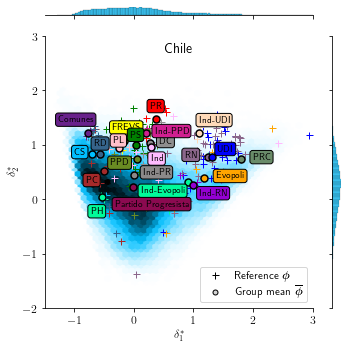

In [6]:
# visualization of two dimensions

xdim = 'latent_dimension_0'
ydim = 'latent_dimension_1'

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_x']), float(row['dim_y']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim) 

for _, row in parliamentarians_df.iterrows():
    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          fontsize = 9)

g.ax_joint.set_xlabel(r'$\delta^*_1$')
g.ax_joint.set_ylabel(r'$\delta^*_2$')

txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
plt.legend(handles = ideo_legend_small, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.show()

#plt.savefig('Figures/AttitudinalSpace/ARF_lrgen_enviroment_bio_nucleaire.pdf')
#plt.clf()
#plt.close()